In [8]:
import os
import zipfile
import pandas as pd
from PIL import Image
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
path = r"C:\Users\saiki\Downloads\mnist_data_extracted\New folder"

In [4]:
file_extensions = []
for root, dirs, files in os.walk(path):
    print(f"Reading images from {root}, Found {len(files)} files.")
    for file_name in files:
        file_extensions.append(os.path.splitext(file_name)[-1])
        file_path = os.path.join(root, file_name)
  
print()
print("Total Number of Files:", len(file_extensions))
print("File extensions:", set(file_extensions))

Reading images from C:\Users\saiki\Downloads\mnist_data_extracted\New folder, Found 0 files.
Reading images from C:\Users\saiki\Downloads\mnist_data_extracted\New folder\A, Found 13870 files.
Reading images from C:\Users\saiki\Downloads\mnist_data_extracted\New folder\B, Found 8668 files.
Reading images from C:\Users\saiki\Downloads\mnist_data_extracted\New folder\C, Found 23409 files.
Reading images from C:\Users\saiki\Downloads\mnist_data_extracted\New folder\D, Found 10134 files.
Reading images from C:\Users\saiki\Downloads\mnist_data_extracted\New folder\E, Found 11440 files.
Reading images from C:\Users\saiki\Downloads\mnist_data_extracted\New folder\F, Found 1163 files.
Reading images from C:\Users\saiki\Downloads\mnist_data_extracted\New folder\G, Found 5762 files.
Reading images from C:\Users\saiki\Downloads\mnist_data_extracted\New folder\H, Found 7218 files.
Reading images from C:\Users\saiki\Downloads\mnist_data_extracted\New folder\I, Found 1120 files.
Reading images from C

In [5]:
def read_image_files(path):
    images_data = []
    for root, dirs, files in os.walk(path):
        for file_name in files:
            extension = os.path.splitext(file_name)[-1]
            if extension in file_extensions:
                file_path = os.path.join(root, file_name)
                img = Image.open(file_path)
                images_data.append({"file_name": file_name,
                                    "extension": extension, 
                                    "size": img.size, 
                                    "mode": img.mode, 
                                    "dir": root})
    return images_data

def load_into_df(images_data):
    df = pd.DataFrame(images_data)
    return df

In [8]:
df

,file_name,extension,size,mode,dir
0,A-0.png,.png,"(28, 28)",L,C:\Users\saiki\Downloads\mnist_data_extracted\...
1,A-1.png,.png,"(28, 28)",L,C:\Users\saiki\Downloads\mnist_data_extracted\...
2,A-10.png,.png,"(28, 28)",L,C:\Users\saiki\Downloads\mnist_data_extracted\...
3,A-100.png,.png,"(28, 28)",L,C:\Users\saiki\Downloads\mnist_data_extracted\...
4,A-1000.png,.png,"(28, 28)",L,C:\Users\saiki\Downloads\mnist_data_extracted\...
...,...,...,...,...,...
372446,Z-995.png,.png,"(28, 28)",L,C:\Users\saiki\Downloads\mnist_data_extracted\...
372447,Z-996.png,.png,"(28, 28)",L,C:\Users\saiki\Downloads\mnist_data_extracted\...
372448,Z-997.png,.png,"(28, 28)",L,C:\Users\saiki\Downloads\mnist_data_extracted\...
372449,Z-998.png,.png,"(28, 28)",L,C:\Users\saiki\Downloads\mnist_data_extracted\...


In [26]:
df['extension'].value_counts()

extension
.png    372451
Name: count, dtype: int64

In [27]:
df['mode'].value_counts()

mode
L    372451
Name: count, dtype: int64

In [28]:
df['size'].value_counts()

size
(28, 28)    372451
Name: count, dtype: int64

In [33]:
df

,file_name,extension,size,mode,dir
0,A-0.png,.png,"(28, 28)",L,C:\Users\saiki\Downloads\mnist_data_extracted\...
1,A-1.png,.png,"(28, 28)",L,C:\Users\saiki\Downloads\mnist_data_extracted\...
2,A-10.png,.png,"(28, 28)",L,C:\Users\saiki\Downloads\mnist_data_extracted\...
3,A-100.png,.png,"(28, 28)",L,C:\Users\saiki\Downloads\mnist_data_extracted\...
4,A-1000.png,.png,"(28, 28)",L,C:\Users\saiki\Downloads\mnist_data_extracted\...
...,...,...,...,...,...
372446,Z-995.png,.png,"(28, 28)",L,C:\Users\saiki\Downloads\mnist_data_extracted\...
372447,Z-996.png,.png,"(28, 28)",L,C:\Users\saiki\Downloads\mnist_data_extracted\...
372448,Z-997.png,.png,"(28, 28)",L,C:\Users\saiki\Downloads\mnist_data_extracted\...
372449,Z-998.png,.png,"(28, 28)",L,C:\Users\saiki\Downloads\mnist_data_extracted\...


In [20]:
path = r"C:\Users\saiki\Downloads\mnist_data_extracted\New folder"

In [21]:
def vectorize_image_files(path):
    image_vectors = []
    image_labels = []
    # Get the list of folder names (labels)
    labels = [dir_name for dir_name in os.listdir(path) if os.path.isdir(os.path.join(path, dir_name))]
    for label in labels:
        label_dir = os.path.join(path, label)
        # Ensure the directory exists
        if os.path.isdir(label_dir):
            # Iterate through each image in the directory
            for image_file in os.listdir(label_dir):
                image_file_path = os.path.join(label_dir, image_file)
                with Image.open(image_file_path) as img:
                    #### Vectorize ####
                    img_arr = np.array(img)
                    image_vector = img_arr.ravel()
                    ###################
                    image_vectors.append(image_vector)
                    image_labels.append(label)
    return image_vectors, image_labels


def load_vectors_into_df(image_vectors, image_labels):
    df = pd.DataFrame(image_vectors, columns=[f"pixel_{i}" for i in range(len(image_vectors[0]))])
    df['labels'] = image_labels
    return df

## Step-1:Load the Dataset

In [22]:
image_vectors, image_labels = vectorize_image_files(path)

image_df = load_vectors_into_df(image_vectors, image_labels)

image_df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A


## Step-2:Explore Data Analysis

In [24]:
len(image_df['labels'].value_counts())

26

<Axes: xlabel='labels', ylabel='count'>

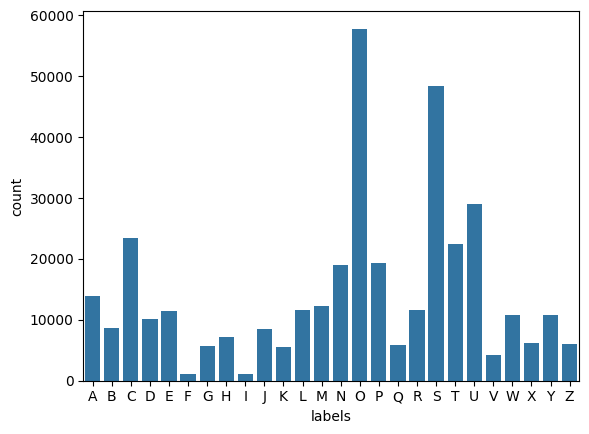

In [25]:
sns.countplot(data = image_df,x = image_df['labels'])

In [26]:
image_df.shape

(372451, 785)

Randomly Generated index: 162407
Label of image at 162407 index: O

Data Type of Image Array: object
Image Array:
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 37 130 220 255 241 159 21 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 41 137 220 250 255 255 255 236 141 0 0 0 0 0 0
  0]
 [0 0 0 0 0 0 0 0 0 0 18 81 189 252 255 255 255 255 255 252 199 54 0 0 0
  0 0 0]
 [0 0 0 0 0 0 0 0 0 1 92 210 255 255 255 255 249 236 235 251 237 143 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 63 195 255 255 255 246 182 91 37 45 171 252 204 52 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 72 204 255 255 255 193 70 0 0 0 14 96 234 238 144 0 0 0
  0 0]
 [0 0 0 0 0 0 0 43 191 252 255 255 188 68 3 0 0 0 8 80 222 255 208 0 0 0
  0 0]
 [0 0 0 0 0 0 0 130 231 255 255 187 67 3 0 0 0 0 25 128 255 255 208 0 0 0
  0 0]
 [0 0 0 

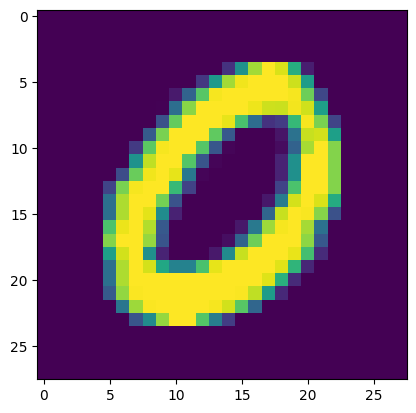

In [30]:
idx = np.random.randint(0, 372451)

print("Randomly Generated index:", idx)

print(f"Label of image at {idx} index:", image_df.iloc[idx, -1])
print()

img = np.reshape(image_df.iloc[idx, 0:-1], (28,28))
print("Data Type of Image Array:", img.dtype)
print("Image Array:\n", img)

img = img.astype("float")

plt.imshow(img)

## Step-3 : Seggregate Input and outputs

In [32]:
image_df.columns

Index(['pixel_0', 'pixel_1', 'pixel_2', 'pixel_3', 'pixel_4', 'pixel_5',
       'pixel_6', 'pixel_7', 'pixel_8', 'pixel_9',
       ...
       'pixel_775', 'pixel_776', 'pixel_777', 'pixel_778', 'pixel_779',
       'pixel_780', 'pixel_781', 'pixel_782', 'pixel_783', 'labels'],
      dtype='object', length=785)

In [33]:
X = image_df.drop(columns="labels")

In [34]:
y = image_df[['labels']]

## Step-4 : Split the Train and Test

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [37]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(260715, 784) (111736, 784)
(260715, 1) (111736, 1)


## Step-5 : Data Preparation on Train Data and Test Data


In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scalar = MinMaxScaler()

In [40]:
X_train_transformed = pd.DataFrame(scalar.fit_transform(X_train),
                                  columns=scalar.get_feature_names_out(),
                                  index = X_train.index)

In [41]:
X_train_transformed.shape

(260715, 784)

In [42]:
X_train_transformed.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
138377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
148612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
308088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
361826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
X_test_transformed = pd.DataFrame(scalar.transform(X_test),
                                 columns=scalar.get_feature_names_out(),
                                 index = X_test.index)

In [44]:
X_test_transformed.shape

(111736, 784)

In [45]:
X_test_transformed.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
186272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
264949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
224093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Step-6,8,9 : Training and Test Phase

## Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
tree = DecisionTreeClassifier()

In [48]:
tree.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [49]:
y_pred = tree.predict(X_test_transformed)

In [50]:
from sklearn import metrics

In [62]:
a = metrics.accuracy_score(y_pred,y_test)

In [63]:
a

0.9388648242285387

## Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
forest = RandomForestClassifier()

In [54]:
forest.fit(X_train_transformed,y_train)

C:\Users\saiki\.conda\anacinda2\sai\envs\saikiran\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [55]:
y_pred1 = forest.predict(X_test_transformed)

In [64]:
b = metrics.accuracy_score(y_pred1,y_test)

In [65]:
b

0.9832462232404955

### Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
reg = LogisticRegression()

In [59]:
reg.fit(X_train_transformed,y_train)

C:\Users\saiki\.conda\anacinda2\sai\envs\saikiran\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\saiki\.conda\anacinda2\sai\envs\saikiran\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
y_pred2 = reg.predict(X_test_transformed)

In [66]:
c = metrics.accuracy_score(y_pred2,y_test)

In [67]:
c

0.879161595188659

## KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
classifier = KNeighborsClassifier()

In [70]:
classifier.fit(X_train_transformed,y_train)

C:\Users\saiki\.conda\anacinda2\sai\envs\saikiran\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [71]:
y_pred3 = classifier.predict(X_test_transformed)

In [72]:
d = metrics.accuracy_score(y_pred3,y_test)

In [73]:
d

0.9569521013818286

## Support Vector Machine

In [74]:
from sklearn.svm import SVC

In [75]:
svc = SVC()

In [ ]:
svc.fit(X_train_transformed,y_train)

C:\Users\saiki\.conda\anacinda2\sai\envs\saikiran\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [2]:
a = 0.9388648242285387
b = 0.9832462232404955


In [4]:
c = 0.879161595188659
d = 0.9569521013818286

In [5]:
algorithms = ["Decision Tree","Random Forest","Logistic Regression","KNN"]

In [6]:
accuracy_score = [a,b,c,d]

C:\Users\saiki\AppData\Local\Temp\ipykernel_5884\1307438087.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = algorithms,y=accuracy_score,palette="tab10")


<Axes: >

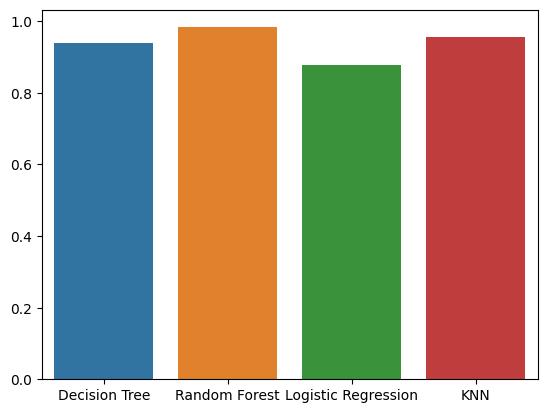

In [11]:
sns.barplot(x = algorithms,y=accuracy_score,palette="tab10")